<font size="6"> AI 724 - Statistical Techniques for Spatio-Temporal Data
Analysis</center>          
<br>


<font size="5">   <center> Kriging using pykrige </center>          
<br>


***Load the required libraries***

# Ordinary Krigging and heat map generation for Geospatial data



Processing TURF.xls

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
# import folium
# rom folium import plugins
%matplotlib inline

### Read the data 
# df=pd.read_csv("data.csv")
# df.head(3)

In [2]:


df = pd.read_csv('Turf.csv')
df.head()
     


,Sensor,Date,Time,Ground Temp,Salinity,Dielectric,Moisture,Latitude,Longtitude,Type
0,G1A0000333_18GFC,July 12th 2021,11:59 AM,8 °C,0.3 dS/m,9 V/m,18%,-41.138691,175.020691,NaN
1,G1A0000338_18GBL,July 12th 2021,12:02 PM,7 °C,0.5 dS/m,7 V/m,15%,-41.139042,175.020737,NaN
2,G1A0000345_ 17GBC,July 12th 2021,12:02 PM,7 °C,0.3 dS/m,7 V/m,15%,-41.135422,175.024002,NaN
3,G1A0000347_ 13GBL,July 12th 2021,12:05 PM,8 °C,0.5 dS/m,7 V/m,15%,-41.137749,175.017578,Creeping Bentgrass
4,G1A0000353_ 2GFC,July 12th 2021,12:00 PM,7 °C,0.6 dS/m,12 V/m,24%,-41.139885,175.012894,Creeping Bentgrass


In [4]:
from pykrige.ok import OrdinaryKriging
import numpy as np

# Define data points
x = [0.0, 2.0, 1.0, 3.0]
y = [0.0, 0.0, 2.0, 1.0]
z = [10.0, 20.0, 30.0, 40.0]

# Define grid
gridx = np.arange(0.0, 3.0, 0.5)
gridy = np.arange(0.0, 2.0, 0.5)

# Perform ordinary kriging
OK = OrdinaryKriging(x, y, z, variogram_model='linear')
z_interp, sigma = OK.execute('grid', gridx, gridy)

# Print results
print(z_interp)

[[9.999999999999998 13.046984622138865 15.791352631690998
  18.148774655618773 19.999999999999996 25.592198356287675]
 [13.826895594736753 16.06272790846117 18.86942074884196
  21.752077776866585 25.23851139494591 30.098616714364965]
 [17.563933402011397 19.863611824373436 22.71120526959928
  25.878181684084108 29.67844495460107 34.455139734756926]
 [20.99220723851321 23.563940166591014 26.532669353205016
  29.466919415145604 32.763158030261806 36.49635485777304]]


In [6]:


lats=df['Latitude']
lons=df['Longtitude']

In [7]:
df['Moisture'] = [int(s.replace("%", "")) for s in df['Moisture']]

In [8]:
val = df['Moisture']

In [9]:
df.head(6)

,Sensor,Date,Time,Ground Temp,Salinity,Dielectric,Moisture,Latitude,Longtitude,Type
0,G1A0000333_18GFC,July 12th 2021,11:59 AM,8 °C,0.3 dS/m,9 V/m,18,-41.138691,175.020691,NaN
1,G1A0000338_18GBL,July 12th 2021,12:02 PM,7 °C,0.5 dS/m,7 V/m,15,-41.139042,175.020737,NaN
2,G1A0000345_ 17GBC,July 12th 2021,12:02 PM,7 °C,0.3 dS/m,7 V/m,15,-41.135422,175.024002,NaN
3,G1A0000347_ 13GBL,July 12th 2021,12:05 PM,8 °C,0.5 dS/m,7 V/m,15,-41.137749,175.017578,Creeping Bentgrass
4,G1A0000353_ 2GFC,July 12th 2021,12:00 PM,7 °C,0.6 dS/m,12 V/m,24,-41.139885,175.012894,Creeping Bentgrass
5,G1A0000354_16GBR,July 12th 2021,12:04 PM,7 °C,0.6 dS/m,8 V/m,16,-41.131798,175.023636,Creeping Bentgrass


In [10]:
# Define the grid on which to interpolate
grid_lon = np.linspace(min(lons), max(lons), 100)
grid_lat = np.linspace(min(lats), max(lats), 100)

In [11]:
OK = OrdinaryKriging(lons, lats, val, variogram_model='linear',
                     verbose=False, enable_plotting=False)

In [12]:

# Interpolate the grid
z, ss = OK.execute('grid', grid_lon, grid_lat)

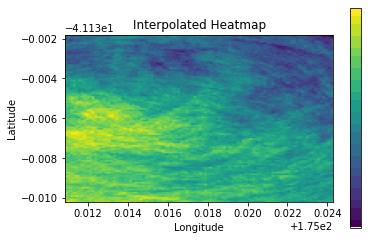

In [13]:
import matplotlib.pyplot as plt

# Create a heatmap of the interpolated values
plt.imshow(z.T, origin='lower', extent=[min(grid_lon), max(grid_lon), min(grid_lat), max(grid_lat)])
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Interpolated Heatmap')
plt.show()

In the imshow function call  z.T refers to the transpose of the interpolated values z.

The reason for transposing z is that the imshow function expects the input to be in row-major order, while OrdinaryKriging.execute returns the interpolated values in column-major order. Transposing z flips the rows and columns, so that the values are in the correct order for imshow.

By specifying origin='lower' in the imshow function call, we're indicating that the (0, 0) coordinate should be located at the bottom-left corner of the plot. This is a common convention for plotting two-dimensional arrays, with the first index (i.e., the row number) corresponding to the y-axis, and the second index (i.e., the column number) corresponding to the x-axis.

In [12]:
z

masked_array(
  data=[[17.833333333333435, 17.833333333333425, 17.833333333333425, ...,
         17.833333333333353, 17.833333333333357, 17.83333333333336],
        [17.833333333333442, 17.833333333333425, 17.833333333333417, ...,
         17.833333333333353, 17.833333333333353, 17.833333333333357],
        [17.83333333333343, 17.83333333333344, 17.833333333333417, ...,
         17.83333333333335, 17.83333333333335, 17.833333333333353],
        ...,
        [17.833333333333396, 17.833333333333393, 17.833333333333382, ...,
         17.83333333333333, 17.83333333333332, 17.833333333333314],
        [17.833333333333396, 17.83333333333339, 17.833333333333393, ...,
         17.83333333333333, 17.833333333333318, 17.83333333333331],
        [17.8333333333334, 17.83333333333339, 17.83333333333339, ...,
         17.83333333333332, 17.833333333333307, 17.833333333333318]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [

In [13]:
print(z)

[[17.833333333333435 17.833333333333425 17.833333333333425 ...
  17.833333333333353 17.833333333333357 17.83333333333336]
 [17.833333333333442 17.833333333333425 17.833333333333417 ...
  17.833333333333353 17.833333333333353 17.833333333333357]
 [17.83333333333343 17.83333333333344 17.833333333333417 ...
  17.83333333333335 17.83333333333335 17.833333333333353]
 ...
 [17.833333333333396 17.833333333333393 17.833333333333382 ...
  17.83333333333333 17.83333333333332 17.833333333333314]
 [17.833333333333396 17.83333333333339 17.833333333333393 ...
  17.83333333333333 17.833333333333318 17.83333333333331]
 [17.8333333333334 17.83333333333339 17.83333333333339 ...
  17.83333333333332 17.833333333333307 17.833333333333318]]


# Universal Kriging example

In [14]:
from pykrige.uk import UniversalKriging


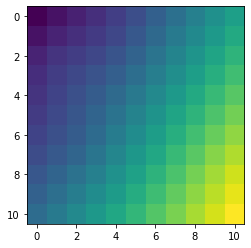

In [15]:
"""
Universal Kriging Example
=========================
In this example we apply a regional linear trend to the kriging system.
"""

import matplotlib.pyplot as plt
import numpy as np

from pykrige.uk import UniversalKriging

data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)

gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)

###############################################################################
# Create the universal kriging object. Required inputs are the X-coordinates of
# the data points, the Y-coordinates of the data points, and the Z-values of the
# data points. Variogram is handled as in the ordinary kriging case.
# drift_terms is a list of the drift terms to include; currently supported terms
# are 'regional_linear', 'point_log', and 'external_Z'. Refer to
# UniversalKriging.__doc__ for more information.

UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

###############################################################################
# Creates the kriged grid and the variance grid. Allows for kriging on a rectangular
# grid of points, on a masked rectangular grid of points, or with arbitrary points.
# (See UniversalKriging.__doc__ for more information.)

z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

# Universal Kriging example

Original data:
Longitude: [122 166  92 138  86 122 136]
Latitude:  [-46 -36 -25 -73 -25  50 -29]
z:         [2.75 3.36 2.24 3.07 3.37 5.25 2.82]

Krige at 60° latitude:
Longitude: [  0.  60. 120. 180. 240. 300. 360.]
Value:     [5.29 5.11 5.27 5.17 5.35 5.63 5.29]
Sigma²:    [2.22 1.32 0.42 1.21 2.07 2.48 2.22]

Ignoring curvature:
Value:     [4.55 4.72 5.25 4.82 4.61 4.53 4.48]
Sigma²:    [3.79 2.   0.39 1.85 3.54 5.46 7.53]


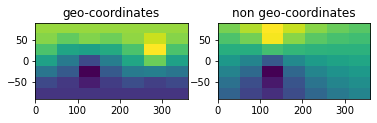

In [16]:
# -*- coding: utf-8 -*-
"""
Geometric example
=================
A small example script showing the usage of the 'geographic' coordinates type
for ordinary kriging on a sphere.
"""

import numpy as np
from matplotlib import pyplot as plt

from pykrige.ok import OrdinaryKriging

# Make this example reproducible:
np.random.seed(89239413)

# Generate random data following a uniform spatial distribution
# of nodes and a uniform distribution of values in the interval
# [2.0, 5.5]:
N = 7
lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0

# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, 7)
grid_lat = np.linspace(-90.0, 90.0, 7)

# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, lat, z, variogram_model="linear", verbose=False, enable_plotting=False
)

# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)

###############################################################################
# Print data at equator (last longitude index will show periodicity):

print("Original data:")
print("Longitude:", lon.astype(int))
print("Latitude: ", lat.astype(int))
print("z:        ", np.array_str(z, precision=2))
print("\nKrige at 60° latitude:\n======================")
print("Longitude:", grid_lon)
print("Value:    ", np.array_str(z1[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss1[5, :], precision=2))
print("\nIgnoring curvature:\n=====================")
print("Value:    ", np.array_str(z2[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss2[5, :], precision=2))

###############################################################################
# We can see that the data point at longitude 122, latitude 50 correctly
# dominates the kriged results, since it is the closest node in spherical
# distance metric, as longitude differences scale with cos(latitude).
# When kriging using longitude / latitude linearly, the value for grid points
# with longitude values further away as longitude is now incorrectly
# weighted equally as latitude.

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()

# Ordinary Kriging example

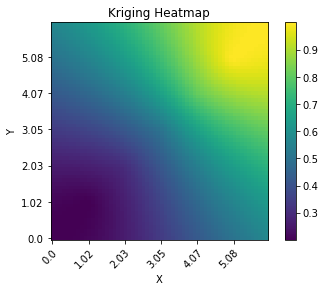

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pykrige import OrdinaryKriging

# Define your x, y, and z data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
z = np.array([0.2, 0.3, 0.5, 0.8, 1.0])

# Define the grid of points at which to estimate values
gridx = np.linspace(0, 6, 60)
gridy = np.linspace(0, 6, 60)

# Create the kriging object
OK = OrdinaryKriging(x, y, z, variogram_model='linear',
                     verbose=False, enable_plotting=False)

# Estimate the values at the grid points
z_interp, sigmasq = OK.execute('grid', gridx, gridy)

# Generate heatmap
fig, ax = plt.subplots()
im = ax.imshow(z_interp, cmap='viridis', origin='lower')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add title and labels
ax.set_title('Kriging Heatmap')
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Define ticks and tick labels
xticks = np.arange(0, 60, 10)
yticks = np.arange(0, 60, 10)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(np.round(gridx[xticks], 2))
ax.set_yticklabels(np.round(gridy[yticks], 2))

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Show the plot
plt.show()